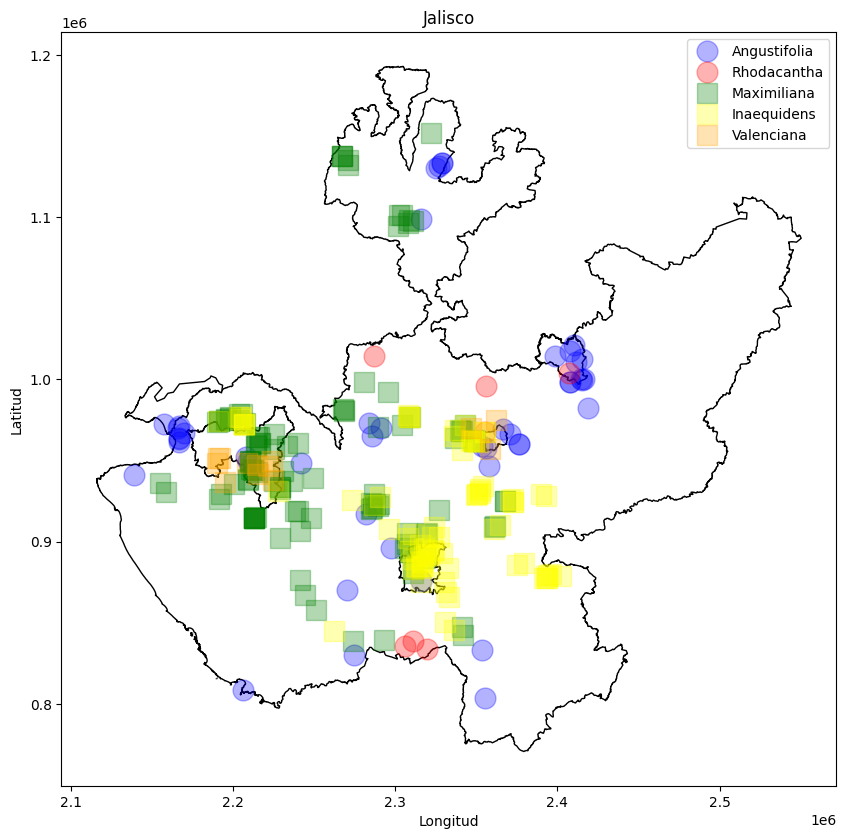

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

jalisco_shapefile_path = "data/14_jalisco/conjunto_de_datos/14ent.shp"
nayarit_shapefile_path = "data/18_nayarit/conjunto_de_datos/18mun.shp"
jalisco_mun_shapefile_path = "data/14_jalisco/conjunto_de_datos/14mun.shp"
jalisco_angustifolia_coordinates_path = "data/jalisco_angustifolia_observations.csv"
banderas_angustifolia_coordinates_path = "data/banderas_angustifolia_observations.csv"
rhodacantha_coordinates_path = "data/jalisco_rhodacantha_observations.csv"
maximiliana_coordinates_path = "data/jalisco_maximiliana_observations.csv"
inaequidens_coordinates_path = "data/jalisco_inaequidens_observations.csv"
valenciana_coordinates_path = "data/jalisco_valenciana_observations.csv"

jalisco = gpd.read_file(jalisco_shapefile_path)
jalisco_mun = gpd.read_file(jalisco_mun_shapefile_path)
nayarit = gpd.read_file(nayarit_shapefile_path)
banderas = nayarit[nayarit['NOMGEO'] == 'Bahía de Banderas']
mascota = jalisco_mun[jalisco_mun['NOMGEO'] == 'Mascota']
tapalpa = jalisco_mun[jalisco_mun['NOMGEO'] == 'Tapalpa']
guadalajara = jalisco_mun[jalisco_mun['NOMGEO'] == 'Guadalajara']
yahualica = jalisco_mun[jalisco_mun['NOMGEO'] == 'Yahualica de González Gallo']

jal_angustifolia_df = pd.read_csv(jalisco_angustifolia_coordinates_path)
banderas_angustifolia_df = pd.read_csv(banderas_angustifolia_coordinates_path)
rhodacantha_df = pd.read_csv(rhodacantha_coordinates_path)
maximiliana_df = pd.read_csv(maximiliana_coordinates_path)
inaequidens_df = pd.read_csv(inaequidens_coordinates_path)
valenciana_df = pd.read_csv(valenciana_coordinates_path)

jal_angus_coordinates = list(zip(jal_angustifolia_df['longitude'], jal_angustifolia_df['latitude']))
banderas_angus_coordinates = list(zip(banderas_angustifolia_df['longitude'], banderas_angustifolia_df['latitude']))
rhoda_coordinates = list(zip(rhodacantha_df['longitude'], rhodacantha_df['latitude']))
maxim_coordinates = list(zip(maximiliana_df['longitude'], maximiliana_df['latitude']))
inaeq_coordinates = list(zip(inaequidens_df['longitude'], inaequidens_df['latitude']))
valen_coordinates = list(zip(valenciana_df['longitude'], valenciana_df['latitude']))

jal_angus_geometry = [Point(lon, lat) for lon, lat in jal_angus_coordinates]
jal_angus_points_gdf = gpd.GeoDataFrame(geometry=jal_angus_geometry, crs="EPSG:4326")
jal_angus_points_gdf = jal_angus_points_gdf.to_crs(jalisco.crs)

banderas_angus_geometry = [Point(lon, lat) for lon, lat in banderas_angus_coordinates]
banderas_angus_points_gdf = gpd.GeoDataFrame(geometry=banderas_angus_geometry, crs="EPSG:4326")
banderas_angus_points_gdf = banderas_angus_points_gdf.to_crs(jalisco.crs)

angus_points_gdf = pd.concat([jal_angus_points_gdf, banderas_angus_points_gdf], ignore_index=True)

rhoda_geometry = [Point(lon, lat) for lon, lat in rhoda_coordinates]
rhoda_points_gdf = gpd.GeoDataFrame(geometry=rhoda_geometry, crs="EPSG:4326")
rhoda_points_gdf = rhoda_points_gdf.to_crs(jalisco.crs)

maxim_geometry = [Point(lon, lat) for lon, lat in maxim_coordinates]
maxim_points_gdf = gpd.GeoDataFrame(geometry=maxim_geometry, crs="EPSG:4326")
maxim_points_gdf = maxim_points_gdf.to_crs(jalisco.crs)

inaeq_geometry = [Point(lon, lat) for lon, lat in inaeq_coordinates]
inaeq_points_gdf = gpd.GeoDataFrame(geometry=inaeq_geometry, crs="EPSG:4326")
inaeq_points_gdf = inaeq_points_gdf.to_crs(jalisco.crs)

valen_geometry = [Point(lon, lat) for lon, lat in valen_coordinates]
valen_points_gdf = gpd.GeoDataFrame(geometry=valen_geometry, crs="EPSG:4326")
valen_points_gdf = valen_points_gdf.to_crs(jalisco.crs)

fig, ax = plt.subplots(figsize=(10, 10))
jalisco.plot(ax=ax, color='white', edgecolor='black')
banderas.plot(ax=ax, color='white', edgecolor='black')
mascota.plot(ax=ax, color='white', edgecolor='black')
tapalpa.plot(ax=ax, color='white', edgecolor='black')
guadalajara.plot(ax=ax, color='white', edgecolor='black')
yahualica.plot(ax=ax, color='white', edgecolor='black')

for point in angus_points_gdf.geometry:
    ax.plot(point.x, point.y, 'o', markersize=15, alpha=0.3, color='blue', label='Angustifolia')

for point in rhoda_points_gdf.geometry:
    ax.plot(point.x, point.y, 'o', markersize=15, alpha=0.3, color='red', label='Rhodacantha')

for point in maxim_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='green', label='Maximiliana')

for point in inaeq_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='yellow', label='Inaequidens')

for point in valen_points_gdf.geometry:
    ax.plot(point.x, point.y, 's', markersize=15, alpha=0.3, color='orange', label='Valenciana')

handles, labels = ax.get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys())

plt.title("Jalisco")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [3]:
print(angus_points_gdf.head())
print(angus_points_gdf.info())

                          geometry
0   POINT (2355488.498 803267.493)
1  POINT (2398419.231 1014371.052)
2  POINT (2414878.201 1000300.397)
3   POINT (2414952.885 999879.795)
4   POINT (2407592.084 998323.023)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  45 non-null     geometry
dtypes: geometry(1)
memory usage: 492.0 bytes
None


In [4]:
print(jal_angus_points_gdf.info())
print(jal_angus_points_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  44 non-null     geometry
dtypes: geometry(1)
memory usage: 484.0 bytes
None
                          geometry
0   POINT (2355488.498 803267.493)
1  POINT (2398419.231 1014371.052)
2  POINT (2414878.201 1000300.397)
3   POINT (2414952.885 999879.795)
4   POINT (2407592.084 998323.023)


In [5]:
print(banderas_angus_points_gdf.info())
print(banderas_angus_points_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 140.0 bytes
None
                         geometry
0  POINT (2157679.336 972833.751)


In [8]:
jal_angustifolia_df['longitude']

0    -103.377975
1    -102.982417
2    -102.822461
3    -102.821716
4    -102.892740
5    -104.199829
6    -104.797115
7    -102.805202
8    -103.411761
9    -105.474548
10   -103.791828
11   -103.247965
12   -103.193171
13   -103.192607
14   -103.668577
15   -103.703011
16   -103.387707
17   -102.868316
18   -102.854118
19   -103.683528
20   -103.668455
21   -102.890188
22   -103.941320
23   -102.818066
24   -104.092003
25   -103.287278
26   -103.761189
27   -104.152985
28   -104.068320
29   -104.014700
30   -105.211724
31   -105.220085
32   -105.212168
33   -105.214359
34   -104.483388
35   -104.810075
36   -104.800520
37   -105.183086
38   -104.083040
39   -102.782913
40   -102.893579
41   -103.370960
42   -103.400995
43   -105.214465
Name: longitude, dtype: float64